In [1]:
from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
import warnings
warnings.filterwarnings(action='ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf     # acf, pacf 그래프 그리기 위한 패키지
from statsmodels.tsa.arima.model import ARIMA         # ARIMA 모델 불러오는 패키지
from matplotlib import dates    # 날짜 
from pandas import to_datetime
import pandas as pd
from datetime import datetime as dt 
from pandas import DataFrame


In [7]:
origin = my_read_excel('C:/Users/J/Desktop/Data_Science/Class/E.추론통계/E.InferentialStatistics/수업자료/born_baby.xlsx',index_col='시점')
origin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 2000년 01월 to 2022년 12월
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   서울특별시    276 non-null    int64
 1   부산광역시    276 non-null    int64
 2   대구광역시    276 non-null    int64
 3   인천광역시    276 non-null    int64
 4   광주광역시    276 non-null    int64
 5   대전광역시    276 non-null    int64
 6   울산광역시    276 non-null    int64
 7   세종특별자치시  276 non-null    int64
 8   경기도      276 non-null    int64
 9   강원도      276 non-null    int64
 10  충청북도     276 non-null    int64
 11  충청남도     276 non-null    int64
 12  전라북도     276 non-null    int64
 13  전라남도     276 non-null    int64
 14  경상북도     276 non-null    int64
 15  경상남도     276 non-null    int64
 16  제주특별자치도  276 non-null    int64
dtypes: int64(17)
memory usage: 38.8+ KB
None

데이터프레임 상위 5개 행
+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+------------------+-

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,,
2000년 01월,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842
2000년 02월,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2000년 03월,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
2000년 04월,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
2000년 05월,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733


In [10]:
df = origin.loc[origin.index != '2000년 01월', origin.columns != '서울특별시']
df.head()

,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,,,
2000년 02월,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2000년 03월,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
2000년 04월,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
2000년 05월,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733
2000년 06월,2949,2321,2603,1539,1409,1141,0,10491,1495,1436,1813,1865,1894,2472,2992,611


In [13]:
origin['시점'] = pd.to_datetime(origin['시점'], format='%Y년 %m월')


In [28]:

origin['연도'] = origin['시점'].dt.year
origin['월'] = origin['시점'].dt.month
origin['분기'] = origin['시점'].dt.quarter
origin['요일'] = origin['시점'].dt.day_name()
origin['요일인덱스'] = origin['시점'].dt.weekday

In [29]:
origin.head()

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,...,전라북도,전라남도,경상북도,경상남도,제주특별자치도,연도,월,분기,요일인덱스,요일
0,2000-01-01,12866,3752,3057,3320,2159,1859,1479,0,13527,...,2547,2679,3362,3928,842,2000,1,1,5,Saturday
1,2000-02-01,11797,3632,2698,3069,1916,1752,1388,0,12437,...,2296,2366,3221,3612,764,2000,2,1,1,Tuesday
2,2000-03-01,12453,3935,3057,3267,1893,1835,1524,0,13157,...,2384,2423,3292,3972,809,2000,3,1,2,Wednesday
3,2000-04-01,10782,3464,2753,2683,1773,1690,1360,0,11698,...,2054,2157,2968,3661,680,2000,4,2,5,Saturday
4,2000-05-01,10817,3511,2785,2782,1698,1599,1311,0,11362,...,2041,2109,2973,3516,733,2000,5,2,0,Monday


In [15]:
origin.dtypes

시점         datetime64[ns]
서울특별시               int64
부산광역시               int64
대구광역시               int64
인천광역시               int64
광주광역시               int64
대전광역시               int64
울산광역시               int64
세종특별자치시             int64
경기도                 int64
강원도                 int64
충청북도                int64
충청남도                int64
전라북도                int64
전라남도                int64
경상북도                int64
경상남도                int64
제주특별자치도             int64
dtype: object

In [8]:
# 날짜 컬럼 데이트타임 형식으로 변환 후 인덱스 설정
df= origin.copy()
df['시점'] = df['시점'].astype('str')
# df = pd.to_datetime(df['시점'],)


시점         object
서울특별시       int64
부산광역시       int64
대구광역시       int64
인천광역시       int64
광주광역시       int64
대전광역시       int64
울산광역시       int64
세종특별자치시     int64
경기도         int64
강원도         int64
충청북도        int64
충청남도        int64
전라북도        int64
전라남도        int64
경상북도        int64
경상남도        int64
제주특별자치도     int64
dtype: object

In [11]:
df['시점'] = df['시점'].apply(lambda x: dt.strptime(x, '%Y년 %m월'))
df.set_index('시점', inplace=True)
my_pretty_table(df.head())

+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+------------------+----------+----------+------------+------------+------------+------------+------------+------------+------------------+
| 시점                |   서울특별시 |   부산광역시 |   대구광역시 |   인천광역시 |   광주광역시 |   대전광역시 |   울산광역시 |   세종특별자치시 |   경기도 |   강원도 |   충청북도 |   충청남도 |   전라북도 |   전라남도 |   경상북도 |   경상남도 |   제주특별자치도 |
|---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+------------------+----------+----------+------------+------------+------------+------------+------------+------------+------------------|
| 2000-01-01 00:00:00 |        12866 |         3752 |         3057 |         3320 |         2159 |         1859 |         1479 |                0 |    13527 |     1966 |       1903 |       2398 |       2547 |       2679 |       3362 |       3928 |              842 |
| 2000-02-01 

In [12]:
df['전국'] = df.sum(axis=1)
df

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국
시점,,,,,,,,,,,,,,,,,,
2000-01-01,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842,61644
2000-02-01,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764,56723
2000-03-01,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809,59878
2000-04-01,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680,53058
2000-05-01,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733,52492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3670,1249,854,1265,643,768,448,236,6635,632,676,928,577,686,975,1182,358,21782
2022-09-01,3651,1209,863,1262,681,705,490,269,6657,650,663,889,596,766,989,1264,314,21918
2022-10-01,3612,1166,848,1200,632,656,445,276,6154,613,583,848,577,642,959,1157,278,20646


In [13]:
df2 = df[['전국']]
my_pretty_table(df2.head())

+---------------------+--------+
| 시점                |   전국 |
|---------------------+--------|
| 2000-01-01 00:00:00 |  61644 |
| 2000-02-01 00:00:00 |  56723 |
| 2000-03-01 00:00:00 |  59878 |
| 2000-04-01 00:00:00 |  53058 |
| 2000-05-01 00:00:00 |  52492 |
+---------------------+--------+


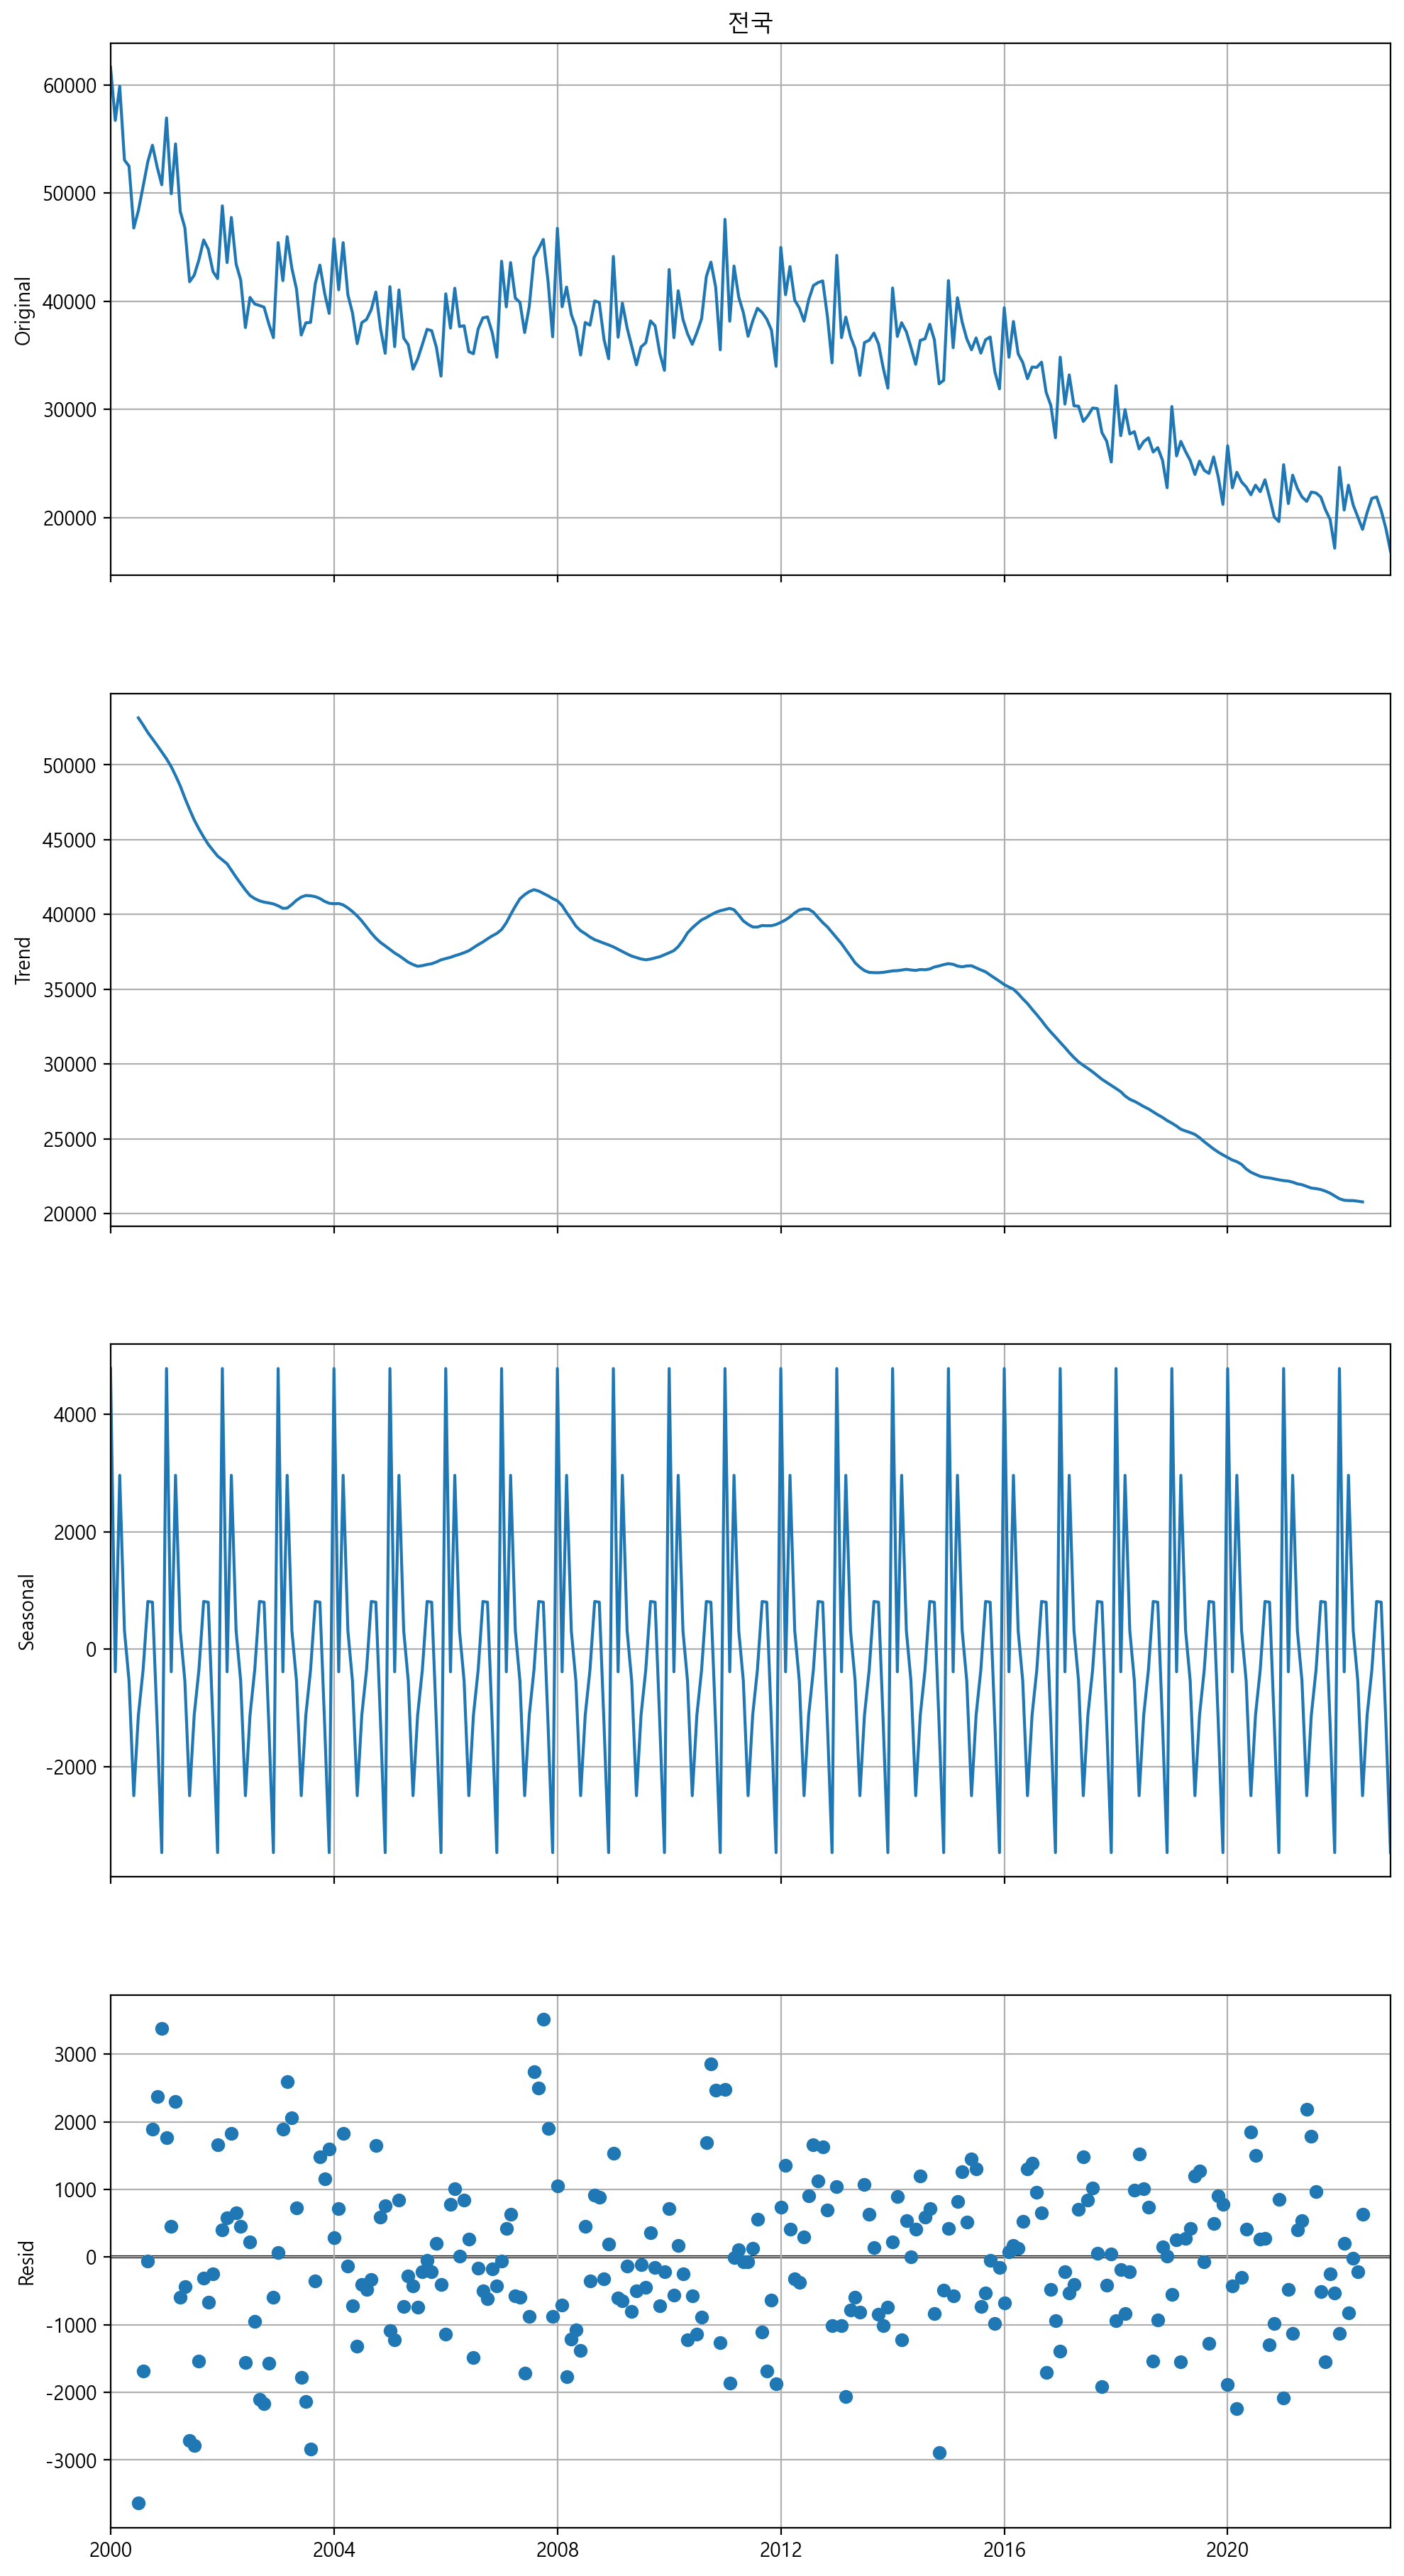

,original,trend,seasonal,resid
시점,,,,
2000-01-01,61644.0,NaN,4779.429451,NaN
2000-02-01,56723.0,NaN,-386.602746,NaN
2000-03-01,59878.0,NaN,2959.586648,NaN
2000-04-01,53058.0,NaN,313.363163,NaN
2000-05-01,52492.0,NaN,-543.445549,NaN
...,...,...,...,...
2022-08-01,21782.0,NaN,-354.701231,NaN
2022-09-01,21918.0,NaN,810.683239,NaN
2022-10-01,20646.0,NaN,798.796875,NaN


In [14]:
my_seasonal_decompose(df2['전국'], dpi=200)

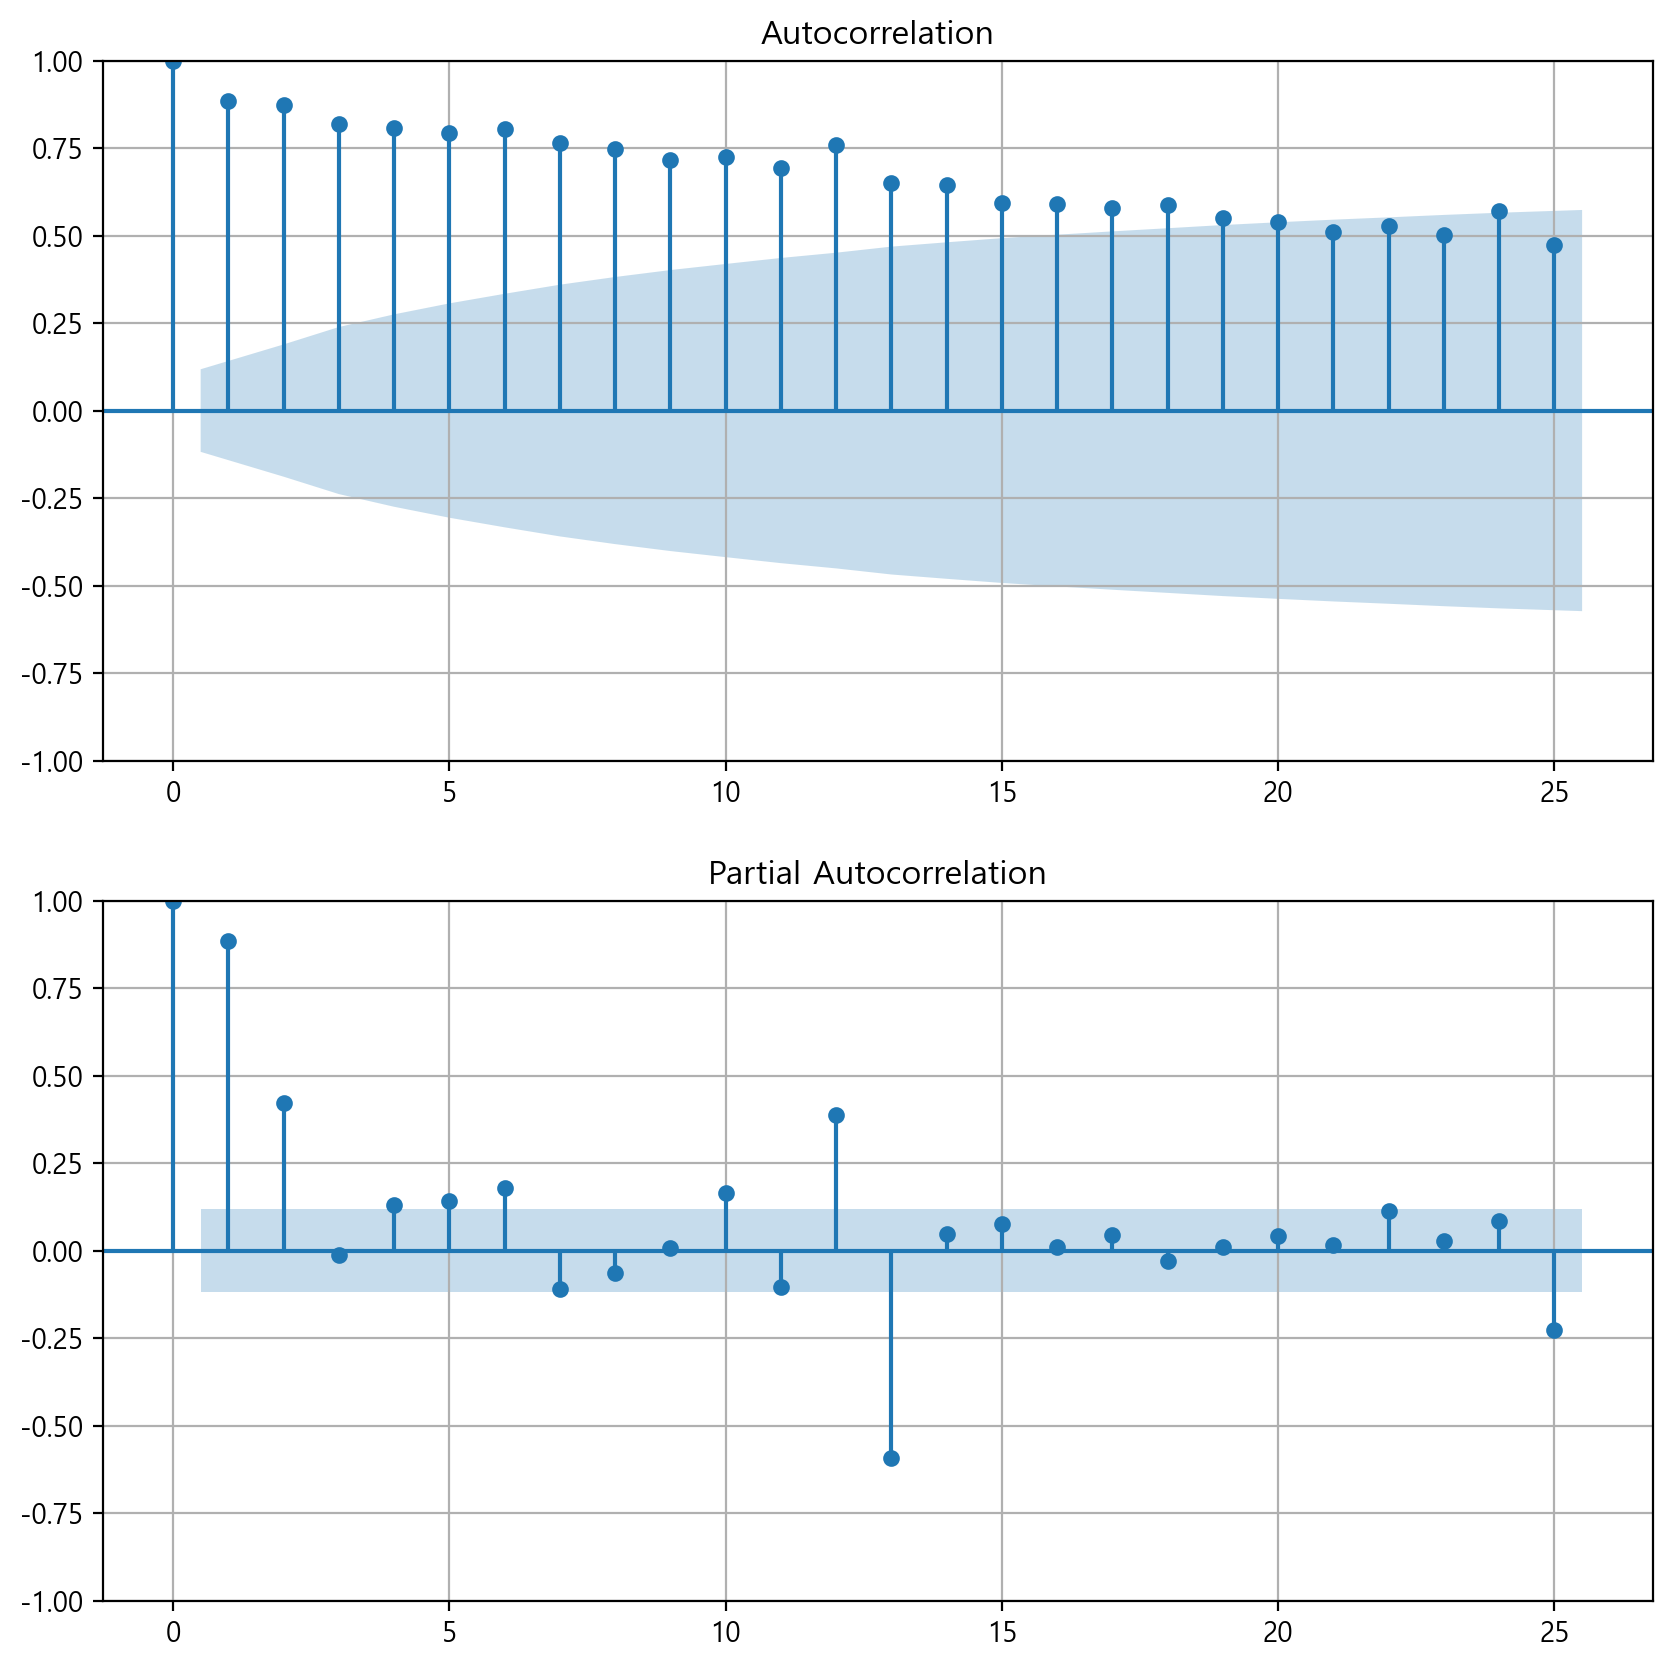

In [15]:
my_acf_pacf_plot(df2['전국'], dpi=200)

In [16]:
train, test = my_timeseries_split(df2)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3602.303, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3595.853, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3591.642, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3604.331, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3576.973, Time=0.44 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=3573.672, Time=0.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3589.786, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=3569.917, Time=0.69 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=3574.025, Time=0.70 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3

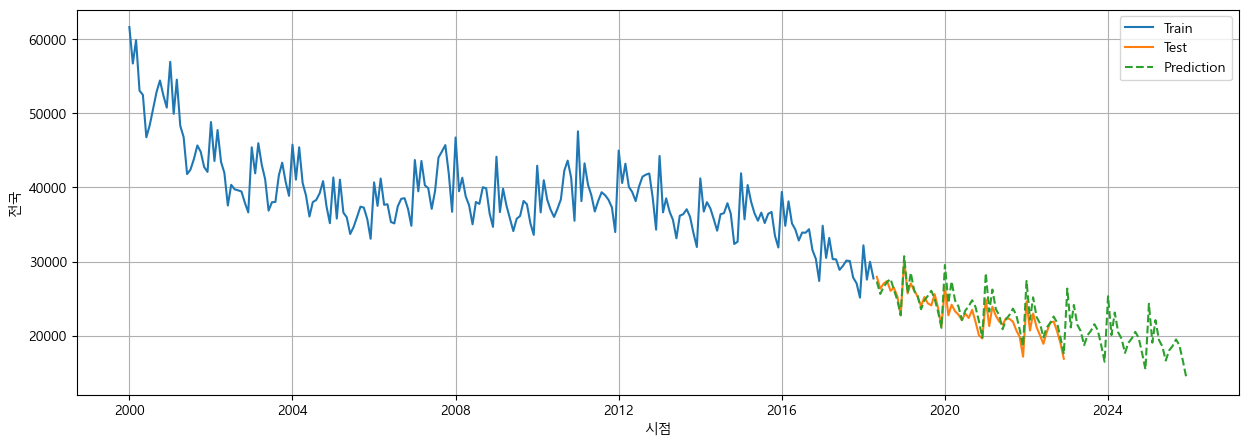

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [17]:
my_arima(train, test, auto=True, p=2, d=1, q=2, s=12, periods=36)